## Sandbox for flood filling

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [20]:
def center_ellipse(x,y,r,c):

    draw.ellipse([x - r, y - r, x + r, y + r],fill=c)

def center_rectangle(x,y,l,w,c):
    l = l/2
    w = w/2
    draw.rectangle([x - w, y - l, x + w, y + l],fill=c)

Flood Filling

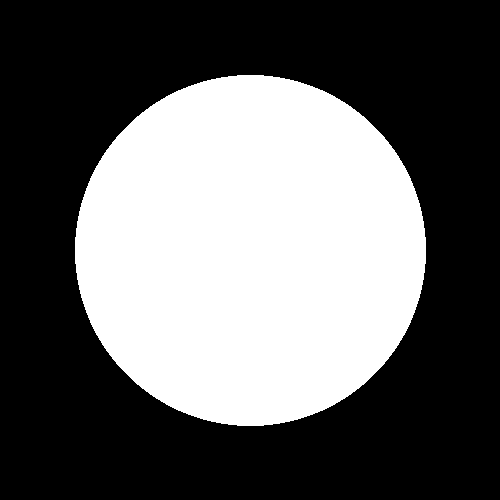

In [48]:
image_resolution = 500

img = Image.new('RGB', (image_resolution, image_resolution))
draw = ImageDraw.Draw(img)

# drawing boundary
radius = 175
thickness = 10
center_point = (image_resolution / 2, image_resolution / 2)
center_ellipse(*center_point, radius, f'rgb({255},{255},{255})')
center_ellipse(*center_point, radius - thickness / 2, f'rgb({0},{0},{0})')


def is_valid(image, width, height, x, y, start_color, visited, tol):

    pixels = image.load()

    if x < 0 or x >= width:
        return False
    if y < 0 or y >= height:
        return False
    # if pixels[x,y] != start_color:
    #     return False
    if not in_tolerance(pixels[x,y],start_color,tol):
        return False
    if visited[x,y] == 1:
        return False

    return True

def in_tolerance(color1, color2, tol):

    dr = abs(color2[0] - color1[0])
    dg = abs(color2[1] - color1[1])
    db = abs(color2[2] - color1[2])

    if dr + dg + db <= tol:
        return True
    else:
        return False

        
def flood_fill(x,y, start_color, new_color,image, tol):
    start_color = (0,0,0)
    pixels = image.load()
    width = image.size[0]
    height = img.size[1]

    visited = np.zeros((width, height))
    queue = []
    queue.append([x,y])

    visited[x,y] = 1

    while len(queue) > 0:
        current = queue[0]
        x = current[0]
        y = current[1]

        pixels[x,y] = new_color

        queue.pop(0)


        neighbors = [[x+1,y],[x-1,y],[x,y+1],[x,y-1]]
        for n in neighbors:
            _x = n[0]
            _y = n[1]
            if is_valid(image,width, height, _x,_y, start_color, visited, tol):
                queue.append([_x,_y])
                visited[_x,_y] = 1
                pixels[_x,_y] = new_color
            

flood_fill(200,200,(0,0,0),(255,255,255),img)

img


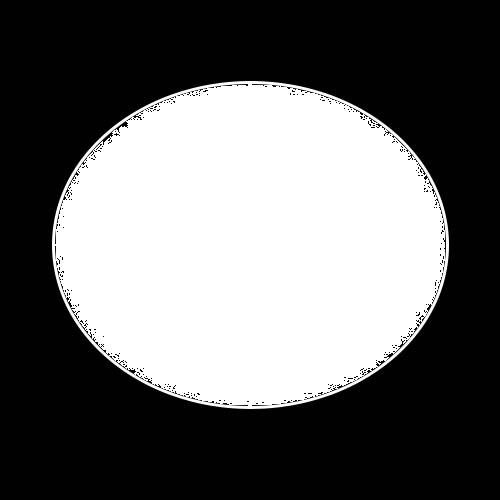

In [49]:
img2 = Image.open("im.jpg")

flood_fill(200,200,(1,1,1),(255,255,255),img2)

img2